In [1]:
!pip install tensorflow==1.15.0

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [3]:
def f1_metric(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

def import_data():
  train_df = pd.read_csv("train.csv")
  test_df = pd.read_csv("test.csv")

  x=train_df[["age", "workclass", "fnlwgt", "educational-num", "gender","hours-per-week", "income_>50K"]]
  y=test_df[["age", "workclass", "fnlwgt", "educational-num", "gender","hours-per-week"]]
  return x, y

In [4]:
train_dataset, test_dataset = import_data()

In [5]:
LE = LabelEncoder()
col_name = ["workclass", "gender"]
train_dataset[col_name] = train_dataset[col_name].apply(LE.fit_transform)
test_dataset[col_name] = test_dataset[col_name].apply(LE.fit_transform)

In [6]:
x_train = train_dataset.drop(["income_>50K"],axis =1)
y_train = np.array(train_dataset["income_>50K"]).reshape(-1,1)
x_test = test_dataset

In [7]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.transform(x_test)

In [8]:
models = tf.keras.models.Sequential()
models.add(tf.keras.layers.Dense(6, activation='relu', input_shape = (6, )))
models.add(tf.keras.layers.Dense(2, activation='relu'))
models.add(tf.keras.layers.Dense(1, activation='sigmoid'))
models.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), f1_metric])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
baseline_history = models.fit(x_train, y_train, validation_split=0.3, epochs=100)

Train on 30769 samples, validate on 13188 samples
Epoch 1/100
30769/30769 [==============================] - 1s 44us/sample - loss: 0.4882 - acc: 0.7401 - recall: 0.0743 - precision: 0.3182 - f1_metric: 0.0977 - val_loss: 0.4297 - val_acc: 0.7806 - val_recall: 0.2133 - val_precision: 0.6156 - val_f1_metric: 0.2968
Epoch 2/100
30769/30769 [==============================] - 1s 41us/sample - loss: 0.4244 - acc: 0.7973 - recall: 0.4303 - precision: 0.6088 - f1_metric: 0.4782 - val_loss: 0.4134 - val_acc: 0.8093 - val_recall: 0.4688 - val_precision: 0.6361 - val_f1_metric: 0.5219
Epoch 3/100
30769/30769 [==============================] - 1s 41us/sample - loss: 0.4135 - acc: 0.8069 - recall: 0.4565 - precision: 0.6348 - f1_metric: 0.5102 - val_loss: 0.4083 - val_acc: 0.8076 - val_recall: 0.4425 - val_precision: 0.6400 - val_f1_metric: 0.5003
Epoch 4/100
30769/30769 [==============================] - 1s 43us/sample - loss: 0.4098 - acc: 0.8080 - recall: 0.4451 - precision: 0.6435 - f1_metric:

In [10]:
# import seaborn as sns

# sns.scatterplot(x="x1", y="x2", hue='class', data=data)

NameError: ignored

In [11]:
OPTIMIZER = tf.keras.optimizers.Adam(
    learning_rate=0.001, name='Adam'
)
tuned_models = tf.keras.models.Sequential()
tuned_models.add(tf.keras.layers.Dense(6, activation='relu', input_shape = (6, )))
tuned_models.add(tf.keras.layers.Dense(3, activation='relu'))
tuned_models.add(tf.keras.layers.Dense(3, activation='relu'))
tuned_models.add(tf.keras.layers.Dense(1, activation='sigmoid'))
tuned_models.compile(optimizer=OPTIMIZER, loss="binary_crossentropy", metrics = ['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), f1_metric])

In [12]:
tuned_models_history = tuned_models.fit(x_train, y_train, validation_split=0.3, epochs=100)

Train on 30769 samples, validate on 13188 samples
Epoch 1/100
30769/30769 [==============================] - 2s 50us/sample - loss: 0.4953 - acc: 0.7484 - recall_1: 0.0179 - precision_1: 0.2079 - f1_metric: 0.0117 - val_loss: 0.4277 - val_acc: 0.7614 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_f1_metric: 0.0000e+00
Epoch 2/100
30769/30769 [==============================] - 1s 44us/sample - loss: 0.4246 - acc: 0.7871 - recall_1: 0.2402 - precision_1: 0.6506 - f1_metric: 0.2782 - val_loss: 0.4177 - val_acc: 0.8068 - val_recall_1: 0.4377 - val_precision_1: 0.6387 - val_f1_metric: 0.4964
Epoch 3/100
30769/30769 [==============================] - 1s 44us/sample - loss: 0.4173 - acc: 0.8057 - recall_1: 0.4459 - precision_1: 0.6346 - f1_metric: 0.4972 - val_loss: 0.4126 - val_acc: 0.8073 - val_recall_1: 0.4425 - val_precision_1: 0.6388 - val_f1_metric: 0.5008
Epoch 4/100
30769/30769 [==============================] - 1s 45us/sample - loss: 0.4131 - acc: 0.8075 - recall_1: 0

In [13]:
data_based = pd.DataFrame(baseline_history.history)
data_tuned = pd.DataFrame(tuned_models_history.history)

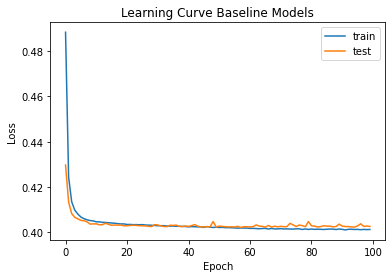

In [14]:
plt.plot(baseline_history.history['loss'], label='train')
plt.plot(baseline_history.history['val_loss'], label='test')
plt.title('Learning Curve Baseline Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# 0.001

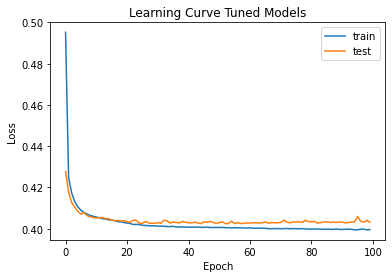

In [15]:
plt.plot(tuned_models_history.history['loss'], label='train')
plt.plot(tuned_models_history.history['val_loss'], label='test')
plt.title('Learning Curve Tuned Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

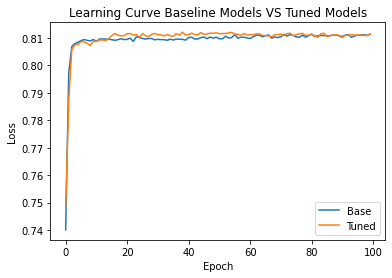

In [16]:
plt.plot(baseline_history.history['acc'], label='base')
plt.plot(tuned_models_history.history['acc'], label='tuned')
plt.title('Learning Curve Baseline Models VS Tuned Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Base', 'Tuned'], loc='lower right')
plt.show()

In [17]:
data_based

,loss,acc,recall,precision,f1_metric,val_loss,val_acc,val_recall,val_precision,val_f1_metric
0,0.488244,0.740063,0.074335,0.318235,0.097739,0.429707,0.780558,0.213287,0.615596,0.296821
1,0.424358,0.797264,0.430277,0.608829,0.478195,0.413400,0.809296,0.468849,0.636050,0.521904
2,0.413521,0.806851,0.456457,0.634786,0.510159,0.408304,0.807628,0.442467,0.640000,0.500336
3,0.409826,0.807956,0.445062,0.643459,0.505350,0.406657,0.807856,0.452320,0.636974,0.509907
4,0.408103,0.808379,0.443842,0.645620,0.503735,0.405969,0.809145,0.419580,0.656390,0.490772
...,...,...,...,...,...,...,...,...,...,...
95,0.401354,0.810946,0.430412,0.662283,0.500787,0.402870,0.811268,0.416402,0.667346,0.485738
96,0.401216,0.810979,0.434753,0.660280,0.500294,0.403826,0.811344,0.394787,0.680175,0.475183
97,0.401330,0.811141,0.430141,0.663250,0.499220,0.402650,0.811799,0.415448,0.670256,0.490250
98,0.401266,0.810914,0.431091,0.661808,0.499778,0.402839,0.812557,0.411952,0.675704,0.489466


In [18]:
print(f'Based Models\nLoss = {data_based.loss.mean()}\nAccuracy = {data_based.acc.mean()}\nPrecision = {data_based[models.metrics_names[3]].mean()}\nRecall = {data_based[models.metrics_names[2]].mean()}\nF1 Score = {data_based.f1_metric.mean()}\n-----------------------------')
print(f'Tuned Models\nLoss = {data_tuned.loss.mean()}\nAccuracy = {data_tuned.acc.mean()}\nPrecision = {data_tuned[tuned_models.metrics_names[3]].mean()}\nRecall = {data_tuned[tuned_models.metrics_names[2]].mean()}\nF1 Score = {data_tuned.f1_metric.mean()}\n-----------------------------')

Based Models
Loss = 0.4038012126065527
Accuracy = 0.8092186999320984
Precision = 0.6515799587965012
Recall = 0.4333817161619663
F1 Score = 0.49827768199145794
-----------------------------
Tuned Models
Loss = 0.40276360339267425
Accuracy = 0.8099216729402542
Precision = 0.6564652974903583
Recall = 0.4257419953867793
F1 Score = 0.49261831283569335
-----------------------------


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3)

In [ ]:
temp = tuned_models.evaluate(X_test, Y_test)

In [ ]:
temp

In [ ]:
plt.plot(baseline_history.history['acc'], label='base')
plt.plot(tuned_models_history.history['acc'], label='tuned')
plt.title('Learning Curve Baseline Models VS Tuned Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Base', 'Tuned'], loc='lower right')
plt.show()